In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
import pandas as pd

import math
import random

from sklearn import preprocessing
#matrix data structure
from patsy import dmatrices,demo_data
#for error logging
import warnings



In [163]:
#outputs probability between 0 and 1, used to help define our logistic regression curve
def sigmoid(x):
    '''Sigmoid function of x.'''
    return 1/(1+np.exp(-x))

In [164]:
keywords = ['yes', 'no', 'HTML', 'Plain', 'none',
           'big', 'small']
mapping = [1,0,0,1,0,1,2]

In [187]:
dataset = pd.read_csv("email_spam.csv")

In [188]:
dataset.head()

,Unnamed: 0,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,no,yes,no,no,no,no,no,no,no,no,11.370,202,HTML,no,no,no,0,big
1,2,0,no,yes,no,no,no,no,no,no,no,no,10.504,202,HTML,no,no,no,1,small
2,3,0,no,yes,no,no,no,no,yes,no,yes,no,7.773,192,HTML,no,no,no,6,small
3,4,0,no,yes,no,no,no,no,no,no,no,no,13.256,255,HTML,no,no,no,48,small
4,5,0,no,yes,no,no,no,no,no,no,no,yes,1.231,29,Plain,no,no,no,1,none


In [171]:
df = dataset.replace(keywords,mapping)

In [172]:
df.head()

,Unnamed: 0,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,0,1,0,0,0,0,0,0,0,0,11.370,202,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,0,0,10.504,202,0,0,0,0,1,2
2,3,0,0,1,0,0,0,0,1,0,1,0,7.773,192,0,0,0,0,6,2
3,4,0,0,1,0,0,0,0,0,0,0,0,13.256,255,0,0,0,0,48,2
4,5,0,0,1,0,0,0,0,0,0,0,1,1.231,29,1,0,0,0,1,0


In [175]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)

In [178]:
df = df.drop(df.columns[[0]], axis=1)

In [183]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,bias
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059810,0.049988,0.0,0.0,0.0,0.0,0.000000,0.5,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055254,0.049988,0.0,0.0,0.0,0.0,0.000809,1.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.040887,0.047501,0.0,0.0,0.0,0.0,0.004854,1.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069732,0.063168,0.0,0.0,0.0,0.0,0.038835,1.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.006471,0.006963,1.0,0.0,0.0,0.0,0.000809,0.0,1


In [182]:
df.insert(df.shape[1], 'bias', 1)

In [184]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,bias
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059810,0.049988,0.0,0.0,0.0,0.0,0.000000,0.5,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055254,0.049988,0.0,0.0,0.0,0.0,0.000809,1.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.040887,0.047501,0.0,0.0,0.0,0.0,0.004854,1.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069732,0.063168,0.0,0.0,0.0,0.0,0.038835,1.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.006471,0.006963,1.0,0.0,0.0,0.0,0.000809,0.0,1


In [190]:
train_ratio = 0.8
data = df.values
random.shuffle(data)
response_col = 0

rows = df.shape[0]
trainrows = int(train_ratio*rows)


In [193]:
data.shape

(3921, 20)

In [203]:
r = 0.95 # covariance between x and z
n = 1000 # number of observations (size of dataset to generate) 
sigma = 1 # variance of noise - how spread out is the data?

beta_x, beta_z, beta_v = -4, .9, 1 # true beta coefficients
var_x, var_z, var_v = 1, 1, 4 # variances of inputs

x, z = np.random.multivariate_normal([0,0], [[var_x,r],[r,var_z]], n).T
v = np.random.normal(0,var_v,n)**3

A = pd.DataFrame({'x' : x, 'z' : z, 'v' : v})

A['log_odds'] = sigmoid(A[['x','z','v']].dot([beta_x,beta_z,beta_v]) + sigma*np.random.normal(0,1,n))

In [205]:
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)'
A['y'] = [np.random.binomial(1,p) for p in A.log_odds]

#create a dataframe that encompasses our input data, model formula, and outputs
y, X = dmatrices(formula, A, return_type='dataframe')

In [206]:
A.head()

,x,z,v,log_odds,y
0,-1.438253,-1.700392,146.788652,1.000000e+00,1
1,-0.729067,-0.780870,-61.241867,1.976843e-26,0
2,0.455405,0.892708,-434.707912,1.500209e-190,0
3,0.702331,1.087981,-172.001708,1.153831e-76,0
4,-1.756032,-1.948800,72.792958,1.000000e+00,1


In [207]:
X.head()

,Intercept,x,z,v,np.exp(x),I(v ** 2 + z)
0,1.0,-1.438253,-1.700392,146.788652,0.237342,21545.208101
1,1.0,-0.729067,-0.780870,-61.241867,0.482359,3749.785351
2,1.0,0.455405,0.892708,-434.707912,1.576812,188971.861666
3,1.0,0.702331,1.087981,-172.001708,2.018452,29585.675471
4,1.0,-1.756032,-1.948800,72.792958,0.172729,5296.865923


In [219]:

#like dividing by zero (Wtff omgggggg universe collapses)
def catch_singularity(f):
    '''Silences LinAlg Errors and throws a warning instead.'''
    
    def silencer(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian!')
            return args[0]
    return silencer

In [236]:
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        print(fxn, Dfxn, xn)
        xn = xn - fxn/Dfxn
    
    print('Exceeded maximum iterations. No solution found.')
    return None


In [235]:
f = lambda x: x**4 - x**3 - 1
Df = lambda x: 4*x**3 - 3*x**2
approx = newton(f,Df,1,1e-10,10)
print(approx)

-1 1 1 1e-10
7.0 20.0 2.0 1e-10
1.9198812499999987 9.801 1.65 1e-10
0.3962390296717748 5.955244063065586 1.4541137383940415 1e-10
0.035453213111630966 4.910294990480834 1.3875775854714016 1e-10
0.0003835118307402574 4.804298132473548 1.380357405588042 1e-10
4.645986662055179e-08 4.803134144789024 1.3802775787704373 1e-10
Found solution after 7 iterations.
1.3802775690976143


In [215]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0,100)
y = np.linspace(0,100)
fig = plt.figure()  
sub = fig.add_subplot(111, xlim=(0, 100), ylim=(1, 100))
PLOT, = sub.plot([],[])

def animate(i):
    PLOT.set_data(x[:i],y[:i])
    #print(x[:i], np.sin(x[:i]))
    return PLOT,

ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=10, blit=True)

In [216]:
ani

In [217]:
d1=pd.DataFrame( np.arange(0, 2*np.pi, 0.01))

In [144]:
d2=pd.DataFrame(np.random.randint(0, 50,629))

In [149]:
dataset=pd.concat([d1, d3], axis=1)

In [148]:
d3 = np.sin(d1 + d2 / 100)

In [150]:
data=dataset.values

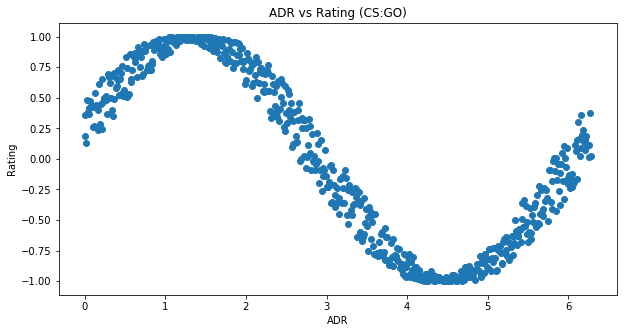

In [151]:
plt.figure(figsize=(10,5))
plt.title('ADR vs Rating (CS:GO)')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [158]:
params = np.zeros((10, 2))
params[:,1] = np.random.uniform(low=-0.5, high=0.5, size=(10,))

In [160]:
params

array([[ 0.        ,  0.38663528],
       [ 0.        , -0.45015882],
       [ 0.        , -0.41238429],
       [ 0.        ,  0.44319353],
       [ 0.        , -0.38772374],
       [ 0.        , -0.01471826],
       [ 0.        ,  0.46370369],
       [ 0.        , -0.4147433 ],
       [ 0.        , -0.20842149],
       [ 0.        , -0.11246905]])